A/B testing on cell phone keyboards



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
save_path = '/content/drive/My Drive/Colab Datasets'
os.chdir(save_path)

In [0]:
#Read data 
import pandas as pd
data = pd.read_excel('键盘AB测试.xlsx')

In [20]:
import numpy as np
import matplotlib.pyplot as plt

data.head()

,A,B
0,6,6
1,6,11
2,2,8
3,7,5
4,8,11


In [6]:
# 描述性统计信息
data.describe()

,A,B
count,25.000000,25.000000
mean,5.080000,7.800000
std,2.059935,2.645751
min,2.000000,3.000000
25%,4.000000,6.000000
50%,5.000000,8.000000
75%,7.000000,10.000000
max,10.000000,13.000000


In [0]:
#A组
col1_mean = data['A'].mean()
col1_std = data['A'].std()

#B组
col2_mean = data['B'].mean()
col2_std = data['B'].std()

In [9]:
print('A组-被测者打字错误平均值\n', col1_mean, '个\n标准差\n', col1_std)
print('B组-被测者打字错误平均值\n', col2_mean, '个\n标准差\n', col2_std)

A组-被测者打字错误平均值
 5.08 个
标准差
 2.05993527406405
B组-被测者打字错误平均值
 7.8 个
标准差
 2.6457513110645903


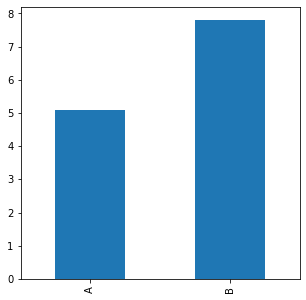

In [10]:
fg = plt.figure(figsize = (5, 5))
ax = fg.add_subplot(1,1,1)
data.mean().plot(kind = 'bar', ax = ax)
plt.show()

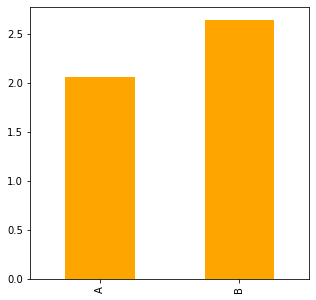

In [11]:
fg = plt.figure(figsize = (5, 5))
ax = fg.add_subplot(1,1,1)
data.std().plot(kind = 'bar', ax = ax, color = 'orange')
plt.show()

In [0]:
# 假设检验
# Null Hypothesis(H0): A组和B组打字错误均值没有差异 (Col1_mean = Col2_mean)
# Alternative Hypothesis(H1): A组与B组打字错误均值有差异 (Col1_mean != Col2_mean)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: 

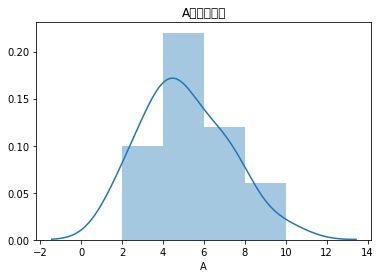

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24067 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32452 missing from current font.
  font.set_

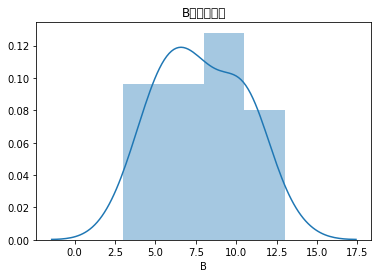

In [13]:
# 选择检验方法
# two sample t- test
import seaborn as sns
sns.distplot(data['A'])
plt.title("A组数据分布")
plt.show()

sns.distplot(data["B"])
plt.title("B组数据分布")
plt.show()

In [21]:
# 观察两组数据分布，可以看到都接近正态分布
# 两组样本均小于30，属于小样本
# 检验方向：双向
# two tail t-test, significance level = 5%
# compute p-value
import statsmodels.stats.weightstats as st
t,p_two,df=st.ttest_ind(data["A"],data["B"],usevar='unequal')
print('t=',t,'p_two=',p_two,'df=',df)

t= -4.0559385368573215 p_two= 0.00019457455307215953 df= 45.27813331135627


In [22]:
a = 0.05
# draw conclusion
if (p_two < a):
  print('有统计显著的证据，拒绝零假设')
  print('证明A/B 键盘之间有差异')
else:
  print('没有统计显著的证据，无法拒绝零假设')
  print('无法证明A/B 键盘之间有差异')

有统计显著的证据，拒绝零假设
证明A/B 键盘之间有差异


In [23]:
# 置信区间
t_ci = 2.0141 #df = 45, alpha = 0.05
a_n=25
b_n=25
se=col1_std/np.sqrt(a_n)+col2_std/np.sqrt(b_n)
sample_mean=col1_mean-col2_mean
lower = sample_mean - t_ci*se
upper = sample_mean + t_ci*se

print('两组平均值差值的置信区间，.95的置信水平 CI=[%f,%f]' % (round(lower,2), round(upper,2)))

两组平均值差值的置信区间，.95的置信水平 CI=[-4.620000,-0.820000]


In [24]:
# 效应量
# 合并标准差
sp=np.sqrt(((a_n-1)*col1_std*col1_std+(b_n-1)*col2_std*col2_std)/(a_n+b_n-2))
d=sample_mean/sp

print('d = ', d)

d =  -1.1471926573950622
